<a href="https://colab.research.google.com/github/AdityaKishore0698/Graduation-Admission-Prediction-System/blob/main/Graduation%20Admission%20Predictoin%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features in the dataset:

1. GRE Scores (290 to 340)
2. TOEFL Scores (92 to 120)
3. University Rating (1 to 5)
4. Statement of Purpose (1 to 5)
5. Letter of Recommendation Strength (1 to 5)
6. Undergraduate CGPA (6.8 to 9.92)
7. Research Experience (0 or 1)
8. Chance of Admit (0.34 to 0.97)

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# import data
admission = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv')

In [ ]:
# view data
admission.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# info of data
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
# summary statistics
admission.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
# check for missing value
admission.isna().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# check for categories
admission.nunique()

Serial No            400
GRE Score             49
TOEFL Score           29
University Rating      5
 SOP                   9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

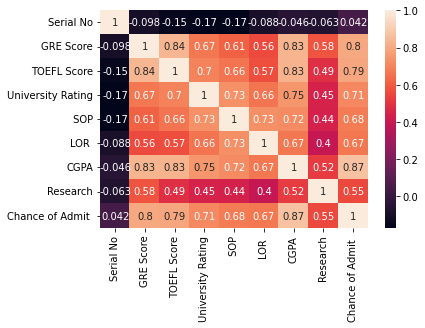

In [ ]:
# Data visualization
sns.heatmap(admission.corr(), annot=True)

In [ ]:
# Remove unwanted columns
admission.drop(['Serial No', 'University Rating', ' SOP',
       'LOR ', 'Research'], axis=1)

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65
...,...,...,...,...
395,324,110,9.04,0.82
396,325,107,9.11,0.84
397,330,116,9.45,0.91
398,312,103,8.78,0.67


In [ ]:
# columns name
admission.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# define y
y = admission['Chance of Admit ']

In [ ]:
# define X
X = admission[['GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research']]

In [ ]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.30, random_state=2529)

In [ ]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280,), (120,))

In [ ]:
# select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# train model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predict with model
y_pred = model.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
# model MAE
mean_absolute_error(y_test,y_pred)

0.04400128934232659

In [ ]:
# model MAPE
mean_absolute_percentage_error(y_test, y_pred)

0.07575278864605452

In [ ]:
# model MSE
mean_squared_error(y_test, y_pred)

0.004038263715495703

In [ ]:
# model RMSE
math.sqrt(mean_squared_error(y_test, y_pred))

0.06354733444839132

In [ ]:
# r2 score value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8066078856630289

In [ ]:
# future prediction
sample = admission.sample()
sample

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
396,397,325,107,3,3.0,3.5,9.11,1,0.84


In [ ]:
# define X_new
X_new = sample.loc[:,X.columns]
X_new

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
396,325,107,3,3.0,3.5,9.11,1


In [ ]:
# predict for X_new
model.predict(X_new)

array([0.81345469])